# **Deep Face Detection**

## Project Content <a id = 0></a>

### First Step: First Organization

1. [Introduction](#1)
2. [Loading Libraries and Packages to Embark Our New Journey](#2)
3. [Collecting Imagews](#3)
4. [Labeling Images](#4)

### Second Step: Data Preprocessing

5. [Reviewing Dataset and Building an Image Loading Function](#5)
6. [Partitioning Unaugmented Data into Three Parts of Train, Validation,  and Test Sets](#6)
7. [Applying Image Augmentation on Images and Labels](#7)
8. [Preparing Images and Labels Dataset](#8)

### Third and Final Step: Modeling

9. [Creating The Model's Architecture](#9)
10. [Determining The Loss and Optimizer](#10)
11. [Building The Training Pypeline](#11)
12. [Compiling and Training](#12)
13. [Plotting The Model's Performance](#13)
14. [Model's Performance Evaluation](#14)
15. [Testing The Model](#15)
16. [Real Time Face Detection](#16)

***

# First Step: First Organization

***

## 1. Introduction <a id = 1></a>

In the era of computer vision and artificial intelligence,
the ability to accurately detect and recognize human faces within images and video streams</br>
has become a fundamental task with wide-ranging applications.</br>

The "Deep Face Detection using TensorFlow" project represents a significant step towards achieving this goal.</br>

Leveraging the power of deep learning and the TensorFlow framework,</br>
this project focuses on developing a robust and efficient face detection system.</br>

By training deep neural networks on custom datasets containing a diverse range of facial images,</br>
this project equips the model with the capability to identify and localize faces within complex scenes.</br>

The resulting deep face detection model promises not only accuracy but also speed,</br>
making it suitable for real-time applications.

Through this project, I delve into the fascinating world of deep learning, computer vision,</br>
and the exciting realm of face detection, paving the way for advancements in facial recognition technology.</br>

I want to thank Nicholas Renotte becuse of his Youtube channel videos that help me alot in achieving this goal.

[Project Content](#0)

## 2. Loading libraries and packages to embark our new journey <a id = 2></a>

In [1]:
# Basic Python packages
import os
import uuid
import time
import random

# Numpy library
import numpy as np

# Pandas library and settings
import pandas as pd

# Visualization libraries (Matplotlib, Seaborn)
import matplotlib.pyplot as plt

# Tensorflow library
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
    
# OpenCV
import cv2
import imghdr

# Albumentations
import albumentations as alb

# JSON
import json

%matplotlib inline

[Project Content](#0)

## <font color="red"> 3. Collecting Images </font> <a id = 3></a>

First of all, define the path you want to save your images and the number of them.

In [2]:
images_path = os.path.join("data", "images")

# Define the number of images.
m = 90

<font color="red"> **Establish a conncetion with device camera.** </font>

In [3]:
capture = cv2.VideoCapture(0)

<font color="red"> **Now, everything seems fine and it's time to capture the images.** </font>

In [4]:
for image_num in range(m):
    
    print(f"Collecting the image {image_num + 1} ...")
    
    # Capture a frame from the camera and generate a unique image path using a UUID and save as JPEG.
    ret, frame = capture.read()
    
    image_path = os.path.join(images_path, f"{str(uuid.uuid1())}.jpeg")
    cv2.imwrite(image_path, frame)
    
    # Display the captured frame.
    cv2.imshow("frame", frame)
    
    # Pause for 2 seconds to change the posture.
    time.sleep(2)
    
    # Check if the "q" key is pressed, and if so, break out of the loop.
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

# Release the video capture resources and close all display windows.
capture.release()
cv2.destroyAllWindows()

print("Process finished!")

2023-09-16 10:47:21.954 python[7892:379582] IMKClient Stall detected, *please Report* your user scenario attaching a spindump (or sysdiagnose) that captures the problem - (imkxpc_bundleIdentifierWithReply:) block performed very slowly (2.05 secs).


Process finished!


[Project Content](#0)

## <font color="red"> 4. Labeling Images </font> <a id = 4></a>

<font color="red"> **Run the cell below if you have not labeled your images.** </font>

In [3]:
!labelme

[INFO   ] __init__:get_config:71 - Loading config file from: /Users/shahriyar/.labelmerc
2023-09-16 11:15:27.310 labelme[8300:398862] +[CATransaction synchronize] called within transaction
2023-09-16 11:20:50.482 labelme[8300:398862] +[CATransaction synchronize] called within transaction
2023-09-16 11:21:12.238 labelme[8300:398862] +[CATransaction synchronize] called within transaction
2023-09-16 11:21:13.954 labelme[8300:398862] +[CATransaction synchronize] called within transaction
2023-09-16 11:21:15.543 labelme[8300:398862] +[CATransaction synchronize] called within transaction
2023-09-16 11:21:21.285 labelme[8300:398862] +[CATransaction synchronize] called within transaction
2023-09-16 11:23:13.138 labelme[8300:398862] +[CATransaction synchronize] called within transaction
2023-09-16 11:23:46.518 labelme[8300:398862] +[CATransaction synchronize] called within transaction
2023-09-16 11:23:53.866 labelme[8300:398862] +[CATransaction synchronize] called within transaction
2023-09-16 

The label json file that is created for each label contains sth like this.</br>
The points will work as data to predict the frame that contains the face.

![Alt text](<Screenshot 1402-07-01 at 10.06.58.png>)

[Project Content](#0)

## 5. Reviewing Dataset and Building an Image Loading Function <a id = 5></a>

We have to limit the GPU memory growth by tf, since it will use all of the space of VRAM.

In [3]:
# Create a list of all GPUs available and then print them.
gpus = tf.config.experimental.list_physical_devices("GPU")

print("List of GPUS")
print("-"*70)

for gpu in gpus:
    print(f"{gpus.index(gpu)}: {gpu}")

print("\nEnabling Dynamic Allocation of GPU Memory")
print("-"*70)

# Set up TensorFlow to dynamically allocate GPU memory for each GPU device in a list (gpus)
# to ensure efficient memory utilization and avoid memory allocation issues.
# Dynamic memory allocation means that TensorFlow will allocate GPU memory as needed,
# rather than reserving the entire GPU memory upfront.
for gpu in gpus: 

    tf.config.experimental.set_memory_growth(gpu, True)
    print(f"{gpus.index(gpu)}: Dynamic allocation has been enabled.")

List of GPUS
----------------------------------------------------------------------
0: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')

Enabling Dynamic Allocation of GPU Memory
----------------------------------------------------------------------
0: Dynamic allocation has been enabled.


Now it's time to load images into the tensorflow data pypeline.

In [ ]:
# Create a TensorFlow Dataset from a list of image file paths, without shuffling them.
images = tf.data.Dataset.list_files("data/images/*.jpeg", shuffle=False)

print(images)

Now, everyhing is fine and we can load and check the images.

In [4]:
def load_image(image_path):
    
    """Reads an image file from the given file path and decodes it into a TensorFlow tensor.

    Args:
        image_path (str): The file path of the image to be loaded.

    Returns:
        decoded_image (tensor): A TensorFlow tensor representing the image.
    """
    
    # Read the image file located at "image_path", and store it as a byte tensor.
    byte_image = tf.io.read_file(image_path)

    # Decode the byte tensor "byte_image" into an image tensor "decoded_image", assuming it's in JPEG format.
    decoded_image = tf.io.decode_jpeg(byte_image)
    
    return decoded_image

Map function will run load image function on each object of the dataset which are passed to pypeline.

In [14]:
# Map the load_image function to each element in the images dataset,
# transforming the dataset by applying load_image to each element.
images = images.map(load_image)

And the last step before viewing the images is to batching them for model's input.

In [31]:
# Create an image generator that batches images into groups of 4,
# and convert them to NumPy arrays for efficient processing.
image_generator = images.batch(4).as_numpy_iterator()

Let's check how these batches are formed.

In [32]:
i = 0

for batch in image_generator:
    
    print(f"Batch {i + 1}: {batch.shape}")
    i += 1

Batch 1: (4, 720, 1280, 3)
Batch 2: (4, 720, 1280, 3)
Batch 3: (4, 720, 1280, 3)
Batch 4: (4, 720, 1280, 3)
Batch 5: (4, 720, 1280, 3)
Batch 6: (4, 720, 1280, 3)
Batch 7: (4, 720, 1280, 3)
Batch 8: (4, 720, 1280, 3)
Batch 9: (4, 720, 1280, 3)
Batch 10: (4, 720, 1280, 3)
Batch 11: (4, 720, 1280, 3)
Batch 12: (4, 720, 1280, 3)
Batch 13: (4, 720, 1280, 3)
Batch 14: (4, 720, 1280, 3)
Batch 15: (4, 720, 1280, 3)
Batch 16: (4, 720, 1280, 3)
Batch 17: (4, 720, 1280, 3)
Batch 18: (4, 720, 1280, 3)
Batch 19: (4, 720, 1280, 3)
Batch 20: (4, 720, 1280, 3)
Batch 21: (4, 720, 1280, 3)
Batch 22: (4, 720, 1280, 3)
Batch 23: (2, 720, 1280, 3)


Now we can visualize these images.

* Remember to assign the variable again in order to make the itteration alive.

In [34]:
image_generator = images.batch(4).as_numpy_iterator()

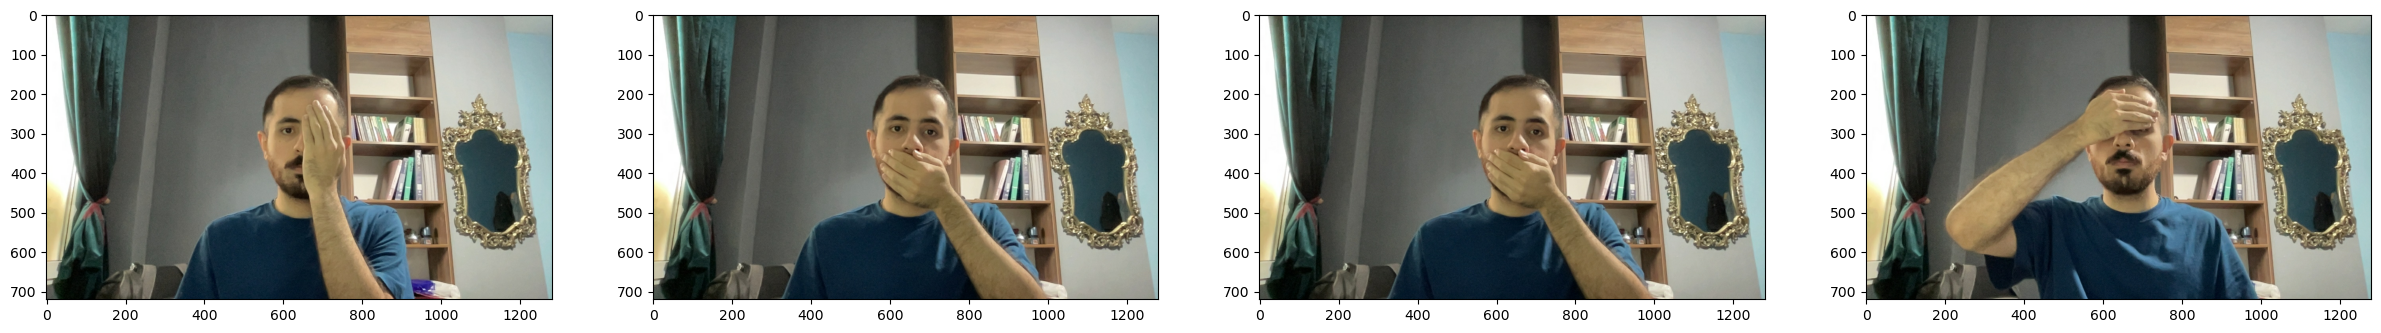

In [39]:
fig, axes = plt.subplots(ncols=4, figsize=(30, 20))

for index, image in enumerate(image_generator.next()):
    axes[index].imshow(image)

[Project Content](#0)

***

# Second Step: Data Preprocessing

***

## <font color="red">6. Partitioning Unaugmented Data into Three Parts of Train, Validation and Test Sets</font> <a id = 6></a>

Define each sets' destination paths.

In [5]:
# Define the target directories where image files will be moved.
images_destination_directories = ["data/train/images",
                                  "data/validation/images",
                                  "data/test/images"]

<font color="red"> **First things first, we must determine the number of images in each set.** </font>

In [ ]:
# Define the proportions for splitting the image files into train, validation, and test sets.
proportions = [0.75, 0.15, 0.10]

# List all the image files in the source directory, and then shuffle them.
images_list = os.listdir(images_path)
random.shuffle(images_list)

# Calculate the total number of image files and the number of files to move to each destination directory.
num_files = len(images_list)
num_destination_files = [int(num_files * proportion) for proportion in proportions]

# Adjust the number of files in the last directory to ensure no files are missed.
if sum(num_destination_files) != m:
    num_destination_files[-2] += 1

print(f"Train set size: {num_destination_files[0]}")
print(f"Validation set size: {num_destination_files[1]}")
print(f"Test set size: {num_destination_files[2]}")
print(25*"-")
print(sum(num_destination_files))

<font color="red"> **Now, we should move the images.** </font>

In [48]:
# Initialize the start index for iterating through the shuffled list of image files.
start_index = 0

# Loop through the destination directories and move the appropriate number of image files to each.
for directory_index, directory in enumerate(images_destination_directories):
    
    # Calculate the end index for the current destination directory.
    end_index = start_index + num_destination_files[directory_index]
    
    # Select the images to move for the current directory
    images_to_move = images_list[start_index:end_index]
        
    # Iterate through the selected images and move them from the source to the destination.
    for image in images_to_move:
        
        source_path = os.path.join(images_path, image)
        destination_path = os.path.join(directory, image)
        
        # Rename (move) the image from the source to the destination directory.
        os.rename(source_path, destination_path)
    
    # Update the start index for the next destination directory.
    start_index = end_index

# Print a message to indicate that image files have been moved successfully
print("Image files moved successfully!")

Image files moved successfully!


Define each label' destination paths.

In [6]:
# Define the path where label files are located, and destination directories for labels.

labels_path = os.path.join("data", "labels")
labels_destination_directories = ["data/train/labels",
                                  "data/validation/labels",
                                  "data/test/labels"]

<font color="red"> **And now, we can move the labels based on the images.** </font>

In [ ]:
# Loop through each destination directory.
for directory_index, directory in enumerate(images_destination_directories):
        
    # List all images in the current destination directory.
    images_list = os.listdir(directory)
    
    # Iterate through each image in the directory.
    for image in images_list:
                
        # Generate the corresponding label filename and Create the source path for the label file.
        label_to_move = image.split(".")[0] + ".json"        
        source_path = os.path.join(labels_path, label_to_move)      
        
        # Check if the label file exists in the source directory.
        if os.path.exists(source_path):
        
            # Create the destination path for the label file based on the current destination directory,
            # and then move (rename) the label file from the source to the destination.
            destination_path = os.path.join(labels_destination_directories[directory_index], label_to_move)
            os.rename(source_path, destination_path)
        
# Print a message indicating that label files have been moved successfully
print("Label files moved successfully!")

Label files moved successfully!


[Project Content](#0)

## <font color="orange">7. Applying Image Augmentation on Images and Labels</font> <a id = 7></a>

Now, we want to augement the images in each set of train, validation and test sets.</br>
Firstly, we have to create an augmentation pypeline.

In [7]:
# Create an augmentation pipeline using the Albumentations library.
augmentor = alb.Compose([
    # Randomly crop the image to a width and height of 450 pixels.
    alb.RandomCrop(width=600, height=600),

    # Apply horizontal flipping with a probability of 50%.
    alb.HorizontalFlip(p=0.5),

    # Apply random brightness and contrast adjustments with a probability of 20%.
    alb.RandomBrightnessContrast(p=0.2),

    # Apply random gamma adjustments with a probability of 20%.
    alb.RandomGamma(p=0.2),

    # Apply random RGB color shifts with a probability of 20%.
    alb.RGBShift(p=0.2),

    # Apply vertical flipping with a probability of 50%.
    alb.VerticalFlip(p=0.5)
    ],

    # Define bounding box parameters for use in object detection tasks.
    bbox_params=alb.BboxParams(
        format="albumentations",  # Format of bounding box annotations.
        label_fields=["class_labels"]  # Field containing class labels for each bounding box.
    ))

Let's check the pypeline for an image and its annonation.

In [8]:
image = cv2.imread(os.path.join(images_destination_directories[0], "0dd0e6b8-5461-11ee-820b-5e8f2d19bd87.jpeg"))

print(f"Image shape is")
print(15*"-")
print(image.shape)
print()

print(f"Image")
print(15*"-")
print(image)

Image shape is
---------------
(720, 1280, 3)

Image
---------------
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [171 176 167]
  [170 174 168]
  [171 175 169]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [170 175 166]
  [169 173 167]
  [168 172 166]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [173 178 169]
  [171 175 169]
  [169 173 167]]

 ...

 [[ 81  85  80]
  [ 86  90  85]
  [ 76  80  75]
  ...
  [186 185 147]
  [186 187 148]
  [187 188 149]]

 [[ 84  88  83]
  [ 82  86  81]
  [ 81  85  80]
  ...
  [184 183 145]
  [183 184 145]
  [184 185 146]]

 [[ 70  74  69]
  [ 71  75  70]
  [ 79  83  78]
  ...
  [182 181 143]
  [182 183 144]
  [184 185 146]]]


In [10]:
with open(os.path.join(labels_destination_directories[0], "0dd0e6b8-5461-11ee-820b-5e8f2d19bd87.json"), "r") as label_file:
    label = json.load(label_file)
    
print("Image's label details")
print(25*"-")

for key in label.keys():
    print(f"{key}: {label[key]}")
    
print("\nImage's label points")
print(25*"-")
print(label["shapes"][0]["points"])

Image's label details
-------------------------
version: 4.5.12
flags: {}
shapes: [{'label': 'face', 'points': [[544.5238095238095, 129.76190476190476], [788.3333333333333, 468.80952380952374]], 'group_id': None, 'shape_type': 'rectangle', 'flags': {}}]
imagePath: ../images/0dd0e6b8-5461-11ee-820b-5e8f2d19bd87.jpeg
imageData: /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCALQBQADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5

We want to extract the vector of the points from each label, so let's do that.

In [ ]:
coordinates = [0, 0, 0, 0]
# x1, y1, x2, y2

coordinates[0] = label["shapes"][0]["points"][0][0]
coordinates[1] = label["shapes"][0]["points"][0][1]
coordinates[2] = label["shapes"][0]["points"][1][0]
coordinates[3] = label["shapes"][0]["points"][1][1]

coordinates

Before going further, let's check the image and its annonations.

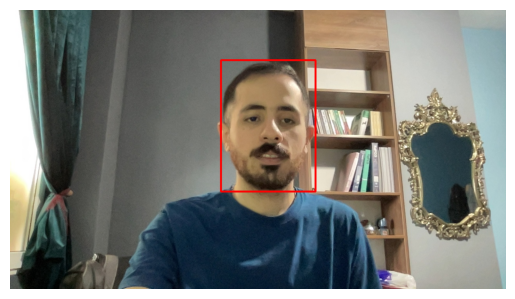

In [13]:
# Convert BGR to RGB color format.
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the four corner coordinates of the rectangle (x, y) for the top-left and (x, y) for the bottom-right.
coordinates = (int(coordinates[0]),
               int(coordinates[1]),
               int(coordinates[2]),
               int(coordinates[3]))  # (x1, y1, x2, y2)

# Define the color and the thickness of the rectangle.
color = (0, 0, 255)    
thickness = 3
    
# Draw the rectangle on the image.
image_with_rectangle = cv2.rectangle(image.copy(),
                                     (coordinates[0], coordinates[1]),
                                     (coordinates[2], coordinates[3]),
                                     color, thickness)
    
# Convert BGR to RGB color format.
image_with_rectangle_rgb = cv2.cvtColor(image_with_rectangle, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib.
plt.imshow(image_with_rectangle_rgb)
plt.axis("off")
plt.show()

As we want to use normalized albumanisation, we have to divide the image's annonation x and y by the width and height of the image.</br>
Meaning that we have to rescale it to match the image resolution.

In [14]:
coordinates = [0, 0, 0, 0]

coordinates[0] = label["shapes"][0]["points"][0][0]
coordinates[1] = label["shapes"][0]["points"][0][1]
coordinates[2] = label["shapes"][0]["points"][1][0]
coordinates[3] = label["shapes"][0]["points"][1][1]

image_height, image_width, _ = image.shape

coordinates[0] /= image_width
coordinates[1] /= image_height
coordinates[2] /= image_width
coordinates[3] /= image_height

coordinates

[0.42540922619047616,
 0.18022486772486773,
 0.6158854166666666,
 0.6511243386243385]

Now, we can apply the augmentation and check the results.

In [15]:
augmented_image = augmentor(image=image,
                            bboxes=[coordinates],
                            class_labels=["face"])

print("Augmented image has these keys")
print(40*"-")
print()

for key in augmented_image.keys():
    print(key)
    print(10*"-")
    print(f"\n{augmented_image[key]}")
    print()

Augmented image has these keys
----------------------------------------

image
----------

[[[ 40  25   6]
  [ 40  25   6]
  [ 39  24   5]
  ...
  [126 120  97]
  [108 101  84]
  [ 89  86  72]]

 [[ 42  25   6]
  [ 39  22   3]
  [ 41  24   5]
  ...
  [115 108  88]
  [ 96  92  74]
  [ 73  71  60]]

 [[ 48  31  12]
  [ 42  25   6]
  [ 46  29  10]
  ...
  [105  98  78]
  [ 90  85  70]
  [ 65  64  54]]

 ...

 [[134 170 200]
  [134 170 200]
  [134 169 202]
  ...
  [ 92  97  96]
  [ 93  98  97]
  [ 88  93  92]]

 [[131 167 197]
  [132 167 200]
  [135 170 203]
  ...
  [ 94  99  98]
  [ 90  95  94]
  [ 88  93  92]]

 [[133 169 199]
  [133 168 201]
  [134 169 202]
  ...
  [ 94  99  98]
  [ 91  96  95]
  [ 94  99  98]]]

bboxes
----------

[(0.1711111111111112, 0.3736507936507938, 0.5774603174603175, 0.9387301587301587)]

class_labels
----------

['face']



Let's check the augmented image and its original format.

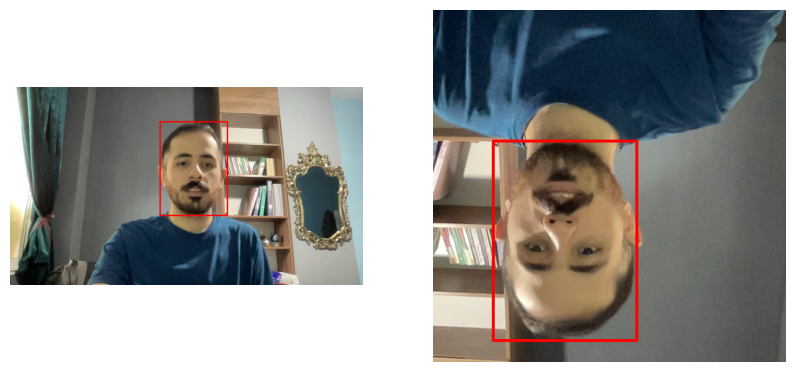

In [16]:
# Create a subplot with two columns.
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

# Draw a red rectangle on the augmented image.
cv2.rectangle(augmented_image["image"],
              tuple(np.multiply(augmented_image["bboxes"][0][:2], [600, 600]).astype(int)),
              tuple(np.multiply(augmented_image["bboxes"][0][2:], [600, 600]).astype(int)),
              (0, 0, 255), 3)

# Display the first image with the drawn rectangle on the left subplot.
axes[0].imshow(image_with_rectangle_rgb)

# Display the second image with the drawn rectangle on the right subplot.
axes[1].imshow(cv2.cvtColor(augmented_image["image"], cv2.COLOR_BGR2RGB))

# Turn off axis labels and ticks for both subplots.
axes[0].axis("off")
axes[1].axis("off")

# Display the images using Matplotlib.
plt.show()

<font color="orange"> **Now, everything is ok and we can build and run the augmentation pypeline.** </font>

In [69]:
# Iterate through data partitions: train, test, validation.
for partition in ["train", "test", "validation"]:
    
    # Iterate through images in the current partition.
    for image in os.listdir(os.path.join("data", partition, "images")):
        
        # Read the image using OpenCV.
        img = cv2.imread(os.path.join("data", partition, "images", image))
        
        # Initialize coordinates for bounding box.
        coords = [0, 0, 0.00001, 0.00001]
        
        # Construct the path to the label file (assuming JSON format).
        label_path = os.path.join("data", partition, "labels", f"{image.split('.')[0]}.json")
        
        # Check if the label file exists.
        if os.path.exists(label_path):
            
            # Read the label file if there is any.
            with open(label_path, "r") as f:
                label = json.load(f)

            # Extract coordinates from label data.
            coords[0] = label["shapes"][0]["points"][0][0]
            coords[1] = label["shapes"][0]["points"][0][1]
            coords[2] = label["shapes"][0]["points"][1][0]
            coords[3] = label["shapes"][0]["points"][1][1]

            # Get image height and width.
            img_height, img_width, _ = img.shape

            # Normalize coordinates to values between 0 and 1.
            coords[0] /= image_width
            coords[1] /= image_height
            coords[2] /= image_width
            coords[3] /= image_height

        # In order to handle the unpredicted errors, try using the try and except.
        try:
            # Apply data augmentation 60 times.
            for x in range(60):
                
                # Perform data augmentation on the image and bounding box
                augmented = augmentor(image=img, bboxes=[coords], class_labels=["face"])
                
                # Save the augmented image to a new file
                cv2.imwrite(os.path.join("aug_data", partition, "images",
                                         f"{image.split('.')[0]}.{x}.jpg"),
                                         augmented["image"])

                # Create an annotation dictionary
                annotation = {}
                annotation["image"] = image

                # Check if bounding boxes were modified during augmentation
                if os.path.exists(label_path):
                    
                    # If there are no bounding boxes, set a default empty bounding box and class 0.
                    if len(augmented["bboxes"]) == 0:
                        
                        annotation["bbox"] = [0, 0, 0, 0]
                        annotation["class"] = 0
                    
                    # If there are bounding boxes, use the first bounding box and set class 1.
                    else:
                        
                        annotation["bbox"] = augmented["bboxes"][0]
                        annotation["class"] = 1
                
                # Assign a 0 frame bounding box if there is no any.
                else:
                    
                    annotation["bbox"] = [0, 0, 0, 0]
                    annotation["class"] = 0

                # Save the annotation data to a JSON file.
                with open(os.path.join("aug_data", partition, "labels",
                                       f"{image.split('.')[0]}.{x}.json"), "w") as f: 
                    json.dump(annotation, f)

        # Show the excepted errors if there are any.
        except Exception as e:   
            print(e)

x_max is less than or equal to x_min for bbox [0.894159226190476, 0.25429894179894175, 0.7296875, 0.0, 'face'].
x_max is less than or equal to x_min for bbox [0.9990699404761905, 0.5492724867724867, 0.85078125, 0.0, 'face'].
y_max is less than or equal to y_min for bbox [0.5370163690476191, 0.25826719576719576, 0.71484375, 0.0, 'face'].
x_max is less than or equal to x_min for bbox [0.6783854166666666, 0.21990740740740738, 0.5437127976190477, 0.5466269841269841, 'face'].
x_max is less than or equal to x_min for bbox [0.60546875, 0.4169973544973545, 0.4388020833333333, 0.6352513227513228, 'face'].
image must be numpy array type
x_max is less than or equal to x_min for bbox [0.16424851190476192, 0.44609788359788355, 0.0005580357142857144, 0.9143518518518517, 'face'].
x_max is less than or equal to x_min for bbox [0.9990699404761905, 0.5439814814814814, 0.846875, 0.0, 'face'].
y_max is less than or equal to y_min for bbox [0.5035342261904762, 0.6537698412698412, 0.6039806547619048, 0.2185

[Project Content](#0)

## 8. Preparing Images and Labels Datasets <a id = 8></a>

Now, we shuffle the data and get some images from each augmented folder using wild card search.</br>
Map function will run load image function on each object of the dataset which are passed to the pypeline.</br>
And for the last step, we compress each image more to get the neural network as efficient as possible.
We also scale each image before ending this process.

Load train set.

In [10]:
# Load the list of file paths for training images, without shuffling.
train_images = tf.data.Dataset.list_files("aug_data/train/images/*.jpg", shuffle=False)

# Load and preprocess each image in the dataset.
train_images = train_images.map(load_image)

# Resize each image to the specified dimensions.
train_images = train_images.map(lambda x: tf.image.resize(x, (120, 120)))

# Normalize pixel values in each image to the range [0, 1] by dividing by 255.
train_images = train_images.map(lambda x: x / 255)

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



Load validation set.

In [11]:
# Load the list of file paths for validation images, without shuffling.
validation_images = tf.data.Dataset.list_files("aug_data/validation/images/*.jpg", shuffle=False)

# Load and preprocess each image in the dataset.
validation_images = validation_images.map(load_image)

# Resize each image to the specified dimensions.
validation_images = validation_images.map(lambda x: tf.image.resize(x, (120, 120)))

# Normalize pixel values in each image to the range [0, 1] by dividing by 255.
validation_images = validation_images.map(lambda x: x/255)

Load test set.

In [12]:
# Load the list of file paths for testing images, without shuffling.
test_images = tf.data.Dataset.list_files("aug_data/test/images/*.jpg", shuffle=False)

# Load and preprocess each image in the dataset.
test_images = test_images.map(load_image)

# Resize each image to the specified dimensions.
test_images = test_images.map(lambda x: tf.image.resize(x, (120, 120)))

# Normalize pixel values in each image to the range [0, 1] by dividing by 255.
test_images = test_images.map(lambda x: x/255)

Now, we should build a label loading function.

In [13]:
def load_labels(label_path):
    
    # Read the JSON label file.
    with open(label_path.numpy(), "r", encoding="utf-8") as file:
        
        # Parse the JSON content into a Python dictionary.
        label = json.load(file)
    
    # Extract and return the "class" and "bbox" values from the loaded label dictionary.
    return [label["class"], label["bbox"]]

Now, we can load labels to tensorflow dataset.

In [14]:
# Create a dataset of file paths to the training labels.
train_labels = tf.data.Dataset.list_files("aug_data/train/labels/*.json", shuffle=False)

# Apply load_labels function to each file path.
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [15]:
# Create a dataset of file paths to the validation labels.
validation_labels = tf.data.Dataset.list_files("aug_data/validation/labels/*.json", shuffle=False)

# Apply load_labels function to each file path.
validation_labels = validation_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [16]:
# Create a dataset of file paths to the validation labels.
test_labels = tf.data.Dataset.list_files("aug_data/test/labels/*.json", shuffle=False)

# Apply load_labels function to each file path.
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

Now, everything is fine, and we can combine the images and labels.

In [17]:
print(f"Train images quantity : {len(train_images)}")
print(f"Train labels quantity : {len(train_labels)}")
print("-"*40)

print(f"Validation images quantity : {len(validation_images)}")
print(f"Validation labels quantity : {len(validation_labels)}")
print("-"*40)

print(f"Test images quantity : {len(test_images)}")
print(f"Test labels quantity : {len(test_labels)}")

Train images quantity : 2280
Train labels quantity : 2280
----------------------------------------
Validation images quantity : 300
Validation labels quantity : 300
----------------------------------------
Test images quantity : 300
Test labels quantity : 300


Now and for the last step in this part, create the final datasets.

In [18]:
# Combine the train images and labels datasets into a single dataset.
train = tf.data.Dataset.zip((train_images, train_labels))

# Shuffle the training dataset to increase randomness during training.
train = train.shuffle(5000) # The argument (5000) determines the buffer size for shuffling.

# Create 8 sample batches of data.
train = train.batch(8) # The argument (8) specifies the batch size.

# Prefetching helps improve training performance by loading data for the next batch in the background.
# This reduces training time as the model doesn't have to wait for data loading.
train = train.prefetch(4) # The argument (4) specifies the number of batches to prefetch.

In [19]:
# Combine the validation images and labels datasets into a single dataset.
validation = tf.data.Dataset.zip((validation_images, validation_labels))

# Shuffle the validation dataset to increase randomness during validation.
validation = validation.shuffle(1300)  # The argument (1300) determines the buffer size for shuffling.

# Create 8 sample batches of data.
validation = validation.batch(8)  # The argument (8) specifies the batch size.

# Prefetching helps improve validation performance by loading data for the next batch in the background.
# This reduces validation time as the model doesn't have to wait for data loading.
validation = validation.prefetch(4)  # The argument (4) specifies the number of batches to prefetch.

In [20]:
# Combine the test images and labels datasets into a single dataset.
test = tf.data.Dataset.zip((test_images, test_labels))

# Shuffle the testing dataset to increase randomness during testing.
test = test.shuffle(1000) # The argument (1000) determines the buffer size for shuffling.

# Create 8 sample batches of data.
test = test.batch(8)  # The argument (8) specifies the batch size.

# Prefetching helps improve testing performance by loading data for the next batch in the background.
# This reduces testing time as the model doesn't have to wait for data loading.
test = test.prefetch(4)  # The argument (4) specifies the number of batches to prefetch.

Now, let's check what have we done!</br>
Firstly, we have to make the train dataset object as an iterated one.

In [21]:
data_samples = train.as_numpy_iterator()

data_samples

Let's get through that and check the images and their labels.

In [22]:
# Get the next batch of data samples.
results = data_samples.next()

# Print information about the images.
print(f"The results variable has {len(results)} items.\n")
print(f"First, the images. For example, the first one from {len(results[0])} images.")
print("-" * 70)

# Print the first image in the batch.
print(results[0][0])

# Print information about the labels.
print("\nAnd then the labels.")
print("-" * 70)
print(results[1][0])

# Print information about the annotations.
print("\nAnd then the annotations.")
print("-" * 70)
print(results[1][1])

The results variable has 2 items.

First, the images. For example, the first one from 8 images.
----------------------------------------------------------------------
[[[0.54901963 0.52156866 0.45882353]
  [0.5764706  0.54901963 0.4862745 ]
  [0.5686275  0.5372549  0.4862745 ]
  ...
  [0.         0.07843138 0.15294118]
  [0.03529412 0.10588235 0.18431373]
  [0.         0.07058824 0.14901961]]

 [[0.5764706  0.54901963 0.4862745 ]
  [0.5882353  0.56078434 0.49803922]
  [0.58431375 0.5529412  0.5019608 ]
  ...
  [0.03137255 0.11372549 0.1882353 ]
  [0.03137255 0.10588235 0.17254902]
  [0.02745098 0.10196079 0.16862746]]

 [[0.57254905 0.5372549  0.47843137]
  [0.5921569  0.5568628  0.49803922]
  [0.58431375 0.54509807 0.49803922]
  ...
  [0.03921569 0.12156863 0.1882353 ]
  [0.04313726 0.11764706 0.18431373]
  [0.01568628 0.08235294 0.15294118]]

 ...

 [[0.34117648 0.3529412  0.3254902 ]
  [0.3254902  0.3372549  0.30980393]
  [0.3882353  0.39607844 0.3764706 ]
  ...
  [0.7921569  0.6549

For example the first four images of this batch are the pictures below.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


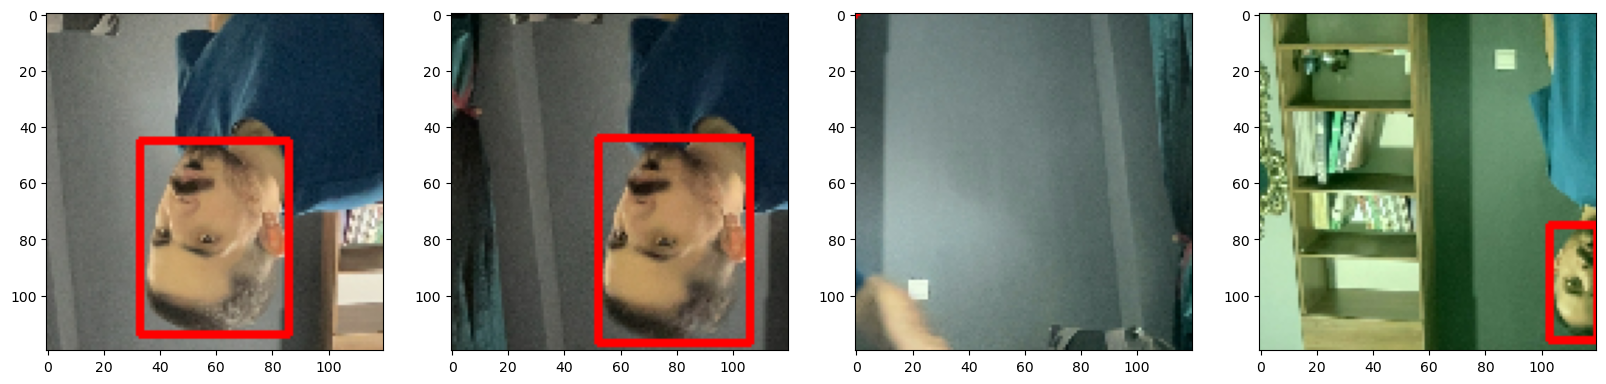

In [23]:
# Create a 1x4 grid of subplots with a large overall figure size.
fig, axes = plt.subplots(ncols=4, figsize=(20, 20))

# Iterate over each of the four subplots.
for i in range(4):
    # Retrieve the sample image and rectangle coordinates from the results.
    sample_image = results[0][i]
    sample_coords = results[1][1][i]
    
    # Draw a red rectangle on the sample image using OpenCV's rectangle function.
    cv2.rectangle(sample_image,
                  tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int)),
                  (255, 0, 0), 2)
    
    # Display the modified sample image on the current subplot.
    axes[i].imshow(sample_image)

Now, everything is fine, and we can get to start modeling step.

[Project Content](#0)

***

# Third and Final Step: Modeling

***

## 9. Creating The Model's Architecture <a id = 9></a>

Firstly, import the VGG16 model's architecture, which is a classification model.

In [24]:
# Create an instance of the VGG16 model without the top (fully connected) layers.
vgg = VGG16(include_top=False)

vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

Now, define the model's architecture.

In [25]:
def get_model():
    
    # Define the input layer for the model.
    input_layer = Input(shape=(120, 120, 3))
    
    # Create a VGG16 base model with the specified input shape, excluding the top classification layers.
    vgg = VGG16(include_top=False)(input_layer)
    
    # Classification Model
    # Apply Global Average Pooling to the VGG features.
    f1 = GlobalAveragePooling2D()(vgg)
    # Add a dense layer with 2048 units and ReLU activation for classification.
    class1 = Dense(2048, activation="relu")(f1)
    # Output a single value using a sigmoid activation for binary classification.
    class2 = Dense(1, activation="sigmoid")(class1)

    # Regression Model
    # Apply Global Average Pooling to the same VGG features.
    f2 = GlobalAveragePooling2D()(vgg)
    # Add a dense layer with 2048 units and ReLU activation for regression.
    regress1 = Dense(2048, activation="relu")(f2)
    # Output 4 values using a sigmoid activation for regression.
    regress2 = Dense(4, activation="sigmoid")(regress1)
    
    # Create the final model that takes the input and produces both classification and regression outputs.
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    
    return facetracker

Instantiate the model's object.

In [26]:
facetracker = get_model()

facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_2[0][0]']             
                                                          8                                       
                                                                                                  
 global_average_pooling2d (  (None, 512)                  0         ['vgg16[0][0]']               
 GlobalAveragePooling2D)                                                                          
                                                                                              

[Project Content](#0)

## 10. Determining The Loss and Optimizer <a id = 10></a>

Now, we should define learning rate decay.

In [27]:
# Calculate the number of batches per epoch based on the training dataset size.
batches_per_epoch = len(train)

# Calculate the learning rate decay as a factor to adjust the learning rate during training.
lr_decay = (1.0 / 0.75 - 1) / batches_per_epoch

print(f"Each epoch trains {batches_per_epoch} batches.")
print(f"Learning rate decay is {lr_decay}")

Each epoch trains 285 batches.
Learning rate decay is 0.0011695906432748536


And the optimizer.

In [28]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=lr_decay)

Then, we need to define localization loss.

In [29]:
def localization_loss(y_true, y_hat):
    
    # Calculate the squared difference of the x and y coordinates between true and predicted bounding boxes.
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - y_hat[:,:2]))
    
    # Extract the height and width of true bounding boxes.
    h_true = y_true[:,3] - y_true[:,1]
    w_true = y_true[:,2] - y_true[:,0]
    
    # Extract the height and width of predicted bounding boxes.
    h_pred = y_hat[:,3] - y_hat[:,1]
    w_pred = y_hat[:,2] - y_hat[:,0]
    
    # Calculate the squared difference of height and width between true and predicted bounding boxes, and sum them up.
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true - h_pred))
    
    # Combine the coordinate and size differences to form the localization loss.
    return delta_coord + delta_size

And classification loss.

In [30]:
# Create a Binary Crossentropy loss function for classification tasks.
classification_loss = tf.keras.losses.BinaryCrossentropy()

# Assign the localization loss function to the regression_loss variable.
regression_loss = localization_loss

[Project Content](#0)

## 11. Building The Training Pypeline <a id = 11></a>

Create a custom class of the facetracker.

In [31]:
class FaceTracker(Model):

    # Initialize the FaceTracker model.    
    def __init__(self, facetracker, **kwargs):
        
        super().__init__(**kwargs)
        
        # Initialize the FaceTracker model.
        self.model = facetracker

    # Compile the FaceTracker model with specified optimizer and loss functions.
    def compile(self, opt, classification_loss, regression_loss, **kwargs):
        
        super().compile(**kwargs)
        
        # Compile the FaceTracker model with specified optimizer and losses.
        self.closs = classification_loss
        self.lloss = regression_loss
        self.opt = opt

    # Perform a single training step with the given batch of data.
    def train_step(self, batch, **kwargs):
        
        # Perform a single training step with the given batch of data.
        X, y = batch
        
        with tf.GradientTape() as tape:
        
            # Forward pass through the model.
            classes, coords = self.model(X, training=True)
            
            # Calculate classification and regression losses.
            batch_classification_loss = self.closs(y[0], classes)
            batch_regression_loss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            # Calculate the total loss as a combination of classification and regression losses.
            total_loss = batch_regression_loss + 0.5 * batch_classification_loss
            
            # Compute gradients.
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        # Apply gradients to update model weights.
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        # Return a dictionary of loss values.
        return {"total_loss": total_loss, "class_loss": batch_classification_loss, "regress_loss": batch_regression_loss}
    
    # Perform a single testing/validation step with the given batch of data.
    def test_step(self, batch, **kwargs):
        
        # Perform a single testing/validation step with the given batch of data.
        X, y = batch
        
        # Forward pass through the model.
        classes, coords = self.model(X, training=False)
        
        # Calculate classification and regression losses.
        batch_classification_loss = self.closs(y[0], classes)
        batch_regression_loss = self.lloss(tf.cast(y[1], tf.float32), coords)
        
        # Calculate the total loss as a combination of classification and regression losses.
        total_loss = batch_regression_loss + 0.5 * batch_classification_loss
        
        # Return a dictionary of loss values.
        return {"total_loss": total_loss, "class_loss": batch_classification_loss, "regress_loss": batch_regression_loss}
    
    # Forward pass through the FaceTracker model.
    def call(self, X, **kwargs):
       
        # Forward pass through the FaceTracker model.
        return self.model(X, **kwargs)

Intantiate a Facetracker object.

In [32]:
model = FaceTracker(facetracker)

[Project Content](#0)

## 12. Compiling and Training <a id = 12></a>

Compile the model.

In [33]:
model.compile(opt, classification_loss, regression_loss)

Define a path for savine the logs and callbacks.

In [34]:
log_directory = "logs"

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_directory)

Now, fit the model.

In [35]:
history = model.fit(train, epochs=10, validation_data=validation, callbacks=[tensorboard_callback])

Epoch 1/10


loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x1x1x8xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x1x1x8xi1>'


285/285 [==============================] - 163s 492ms/step - total_loss: 1.0658 - class_loss: 0.2811 - regress_loss: 0.9253 - val_total_loss: 0.0696 - val_class_loss: 0.0189 - val_regress_loss: 0.0602
Epoch 2/10
285/285 [==============================] - 90s 300ms/step - total_loss: 0.2919 - class_loss: 0.0939 - regress_loss: 0.2450 - val_total_loss: 1.4353 - val_class_loss: 0.6829 - val_regress_loss: 1.0939
Epoch 3/10
285/285 [==============================] - 90s 300ms/step - total_loss: 0.1754 - class_loss: 0.0546 - regress_loss: 0.1481 - val_total_loss: 0.0800 - val_class_loss: 0.1188 - val_regress_loss: 0.0206
Epoch 4/10
285/285 [==============================] - 91s 302ms/step - total_loss: 0.0909 - class_loss: 0.0324 - regress_loss: 0.0747 - val_total_loss: 0.5268 - val_class_loss: 0.3620 - val_regress_loss: 0.3458
Epoch 5/10
285/285 [==============================] - 90s 301ms/step - total_loss: 0.0955 - class_loss: 0.0287 - regress_loss: 0.0812 - val_total_loss: 0.0145 - val_c

Save the model to use it later for more analysis.

In [36]:
# Create the directory if it doesn't exist.
if not os.path.exists("model"):
    os.makedirs("model")

facetracker.save(os.path.join("model", "facetracker.h5"))

/Users/shahriyar/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[Project Content](#0)

## 13. Plotting The Models's Performance <a id = 10></a>

Let's check how the model improves through those epochs.

In [37]:
pd.DataFrame(history.history)

,total_loss,class_loss,regress_loss,val_total_loss,val_class_loss,val_regress_loss
0,0.076017,0.008702,0.071667,0.069649,0.018911,0.060194
1,0.945229,0.317362,0.786548,1.435303,0.682906,1.093851
2,0.144384,0.110820,0.088974,0.079973,0.118811,0.020567
3,0.476115,0.409643,0.271293,0.526797,0.362005,0.345794
4,0.029105,0.001637,0.028286,0.014487,0.005916,0.011529
5,0.014318,0.001499,0.013569,0.002737,0.001202,0.002136
6,0.007347,0.000848,0.006923,0.300027,0.347030,0.126512
7,0.009541,0.000745,0.009168,0.007290,0.002794,0.005893
8,0.008277,0.000294,0.008130,0.002895,0.000381,0.002704
9,0.015071,0.000321,0.014910,0.002697,0.000100,0.002646


Plot the model's evolution.

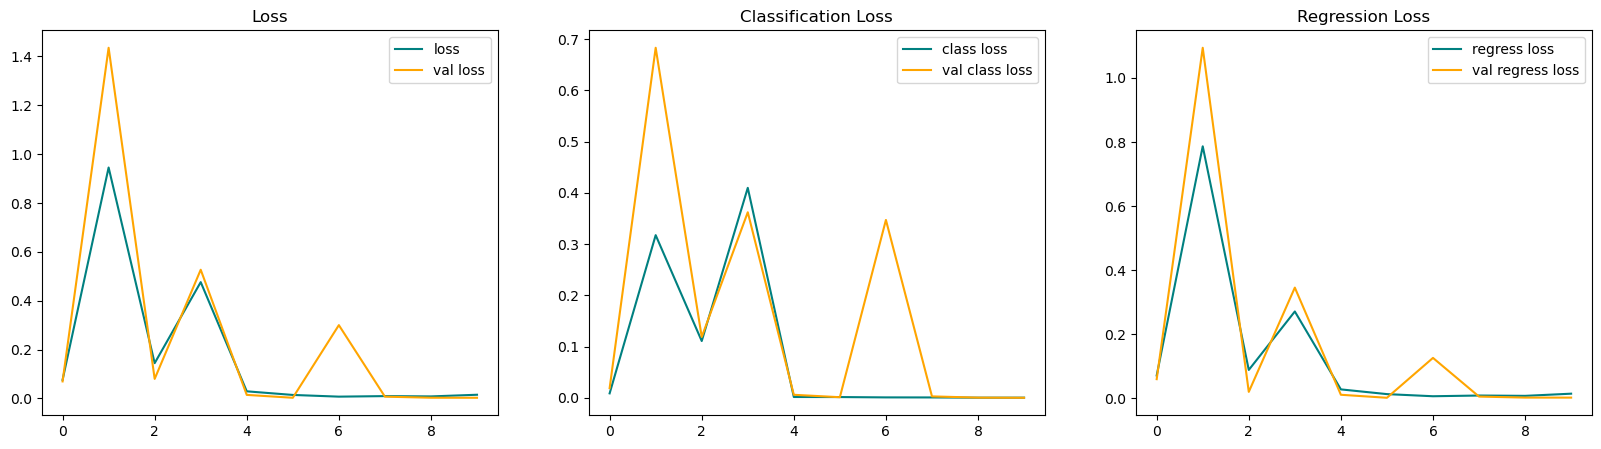

In [38]:
# Create a figure with three subplots arranged in a single row.
fig, ax = plt.subplots(ncols=3, figsize=(20, 5))

# Plot the training loss and validation loss on the first subplot.
ax[0].plot(history.history["total_loss"], color="teal", label="loss")
ax[0].plot(history.history["val_total_loss"], color="orange", label="val loss")
ax[0].title.set_text("Loss")
ax[0].legend()

# Plot the training classification loss and validation classification loss on the second subplot.
ax[1].plot(history.history["class_loss"], color="teal", label="class loss")
ax[1].plot(history.history["val_class_loss"], color="orange", label="val class loss")
ax[1].title.set_text("Classification Loss")
ax[1].legend()

# Plot the training regression loss and validation regression loss on the third subplot.
ax[2].plot(history.history["regress_loss"], color="teal", label="regress loss")
ax[2].plot(history.history["val_regress_loss"], color="orange", label="val regress loss")
ax[2].title.set_text("Regression Loss")
ax[2].legend()

plt.show()

[Project Content](#0)

## 14. Testing The Model <a id = 14></a>

It's time to test the model.

In [39]:
# Get an iterator for the test data, and get the next sample from the test data iterator.
test_data = test.as_numpy_iterator()
test_sample = test_data.next()

# Predict using the facetracker model on the test sample.
y_hat = facetracker.predict(test_sample[0])

1/1 [==============================] - 4s 4s/step


Let's plot what we have done in prediction.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


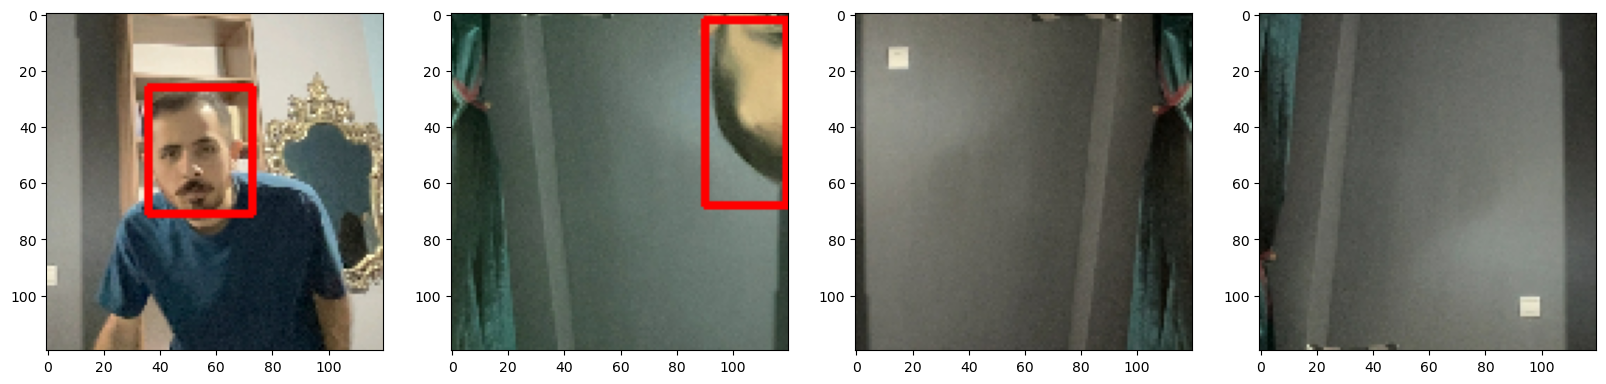

In [40]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

# Iterate through the four subplots
for idx in range(4):
    
    # Get a sample image from the test data
    sample_image = test_sample[0][idx]
    
    # Get the predicted coordinates from y_hat
    sample_coords = y_hat[1][idx]
    
    # Check if the predicted probability is greater than 0.9
    if y_hat[0][idx] > 0.9:
        # If the condition is met, draw a red rectangle on the sample image
        # using the predicted coordinates and scale it by [120, 120].
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int)), 
                      (255, 0, 0), 2)
    
    ax[idx].imshow(sample_image)

[Project Content](#0)

## 15. Real Time Face Detection <a id = 15></a>

We can real time detect faces using this block of code.

In [ ]:
# Open a video capture stream from the default camera (usually the webcam)
cap = cv2.VideoCapture(0)

# Continuously process video frames until the user quits
while cap.isOpened():
    
    # Read a frame from the video capture
    _ , frame = cap.read()
    
    # Crop the frame to focus on a specific region of interest
    frame = frame[50:500, 50:500,:]
    
    # Convert the frame from BGR color space to RGB
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Resize the frame to a fixed size (120x120) using TensorFlow
    resized = tf.image.resize(rgb, (120,120))
    
    # Use a face tracking model to predict the location of a face
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    # If a face is detected with confidence higher than 0.5
    if yhat[0] > 0.5: 
        
        # Draw a rectangle around the detected face (main rectangle)
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                      (255,0,0), 2)
        
        # Draw a label rectangle below the detected face
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), [80,0])), 
                      (255,0,0), -1)
        
        # Render the text "face" inside the label rectangle
        cv2.putText(frame, 'face', 
                    tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    # Display the frame with annotations
    cv2.imshow('EyeTrack', frame)
    
    # Check if the user pressed the 'q' key to quit
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

# Release the video capture and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()

[Project Content](#0)